<a href="https://colab.research.google.com/github/pranavram2005/Tumor_Detection/blob/main/Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install dicom2jpg to convert dicom images(CT scans) to jpg.

In [ ]:
!pip install dicom2jpg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.5 MB/s eta 0:00:00


In [ ]:
import dicom2jpg

Convert dicom images to png images for classifying

In [ ]:
dicom_dir = "train_img1"
export_loc = "train_img2"
dicom2jpg.dicom2png(dicom_dir,export_loc)

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (13-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (13-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (14-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (14-bit). It's recom

True

**Import required libraries.**

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import random




```
# This is formatted as code
```

**Open and check the image through openCV**

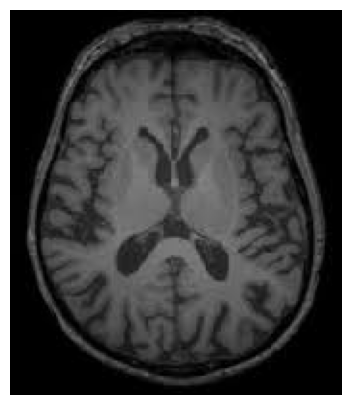

In [3]:
img = "no_tumor/10 no.jpg"
img1 = cv2.imread(img)
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(img2)


**Check random images**

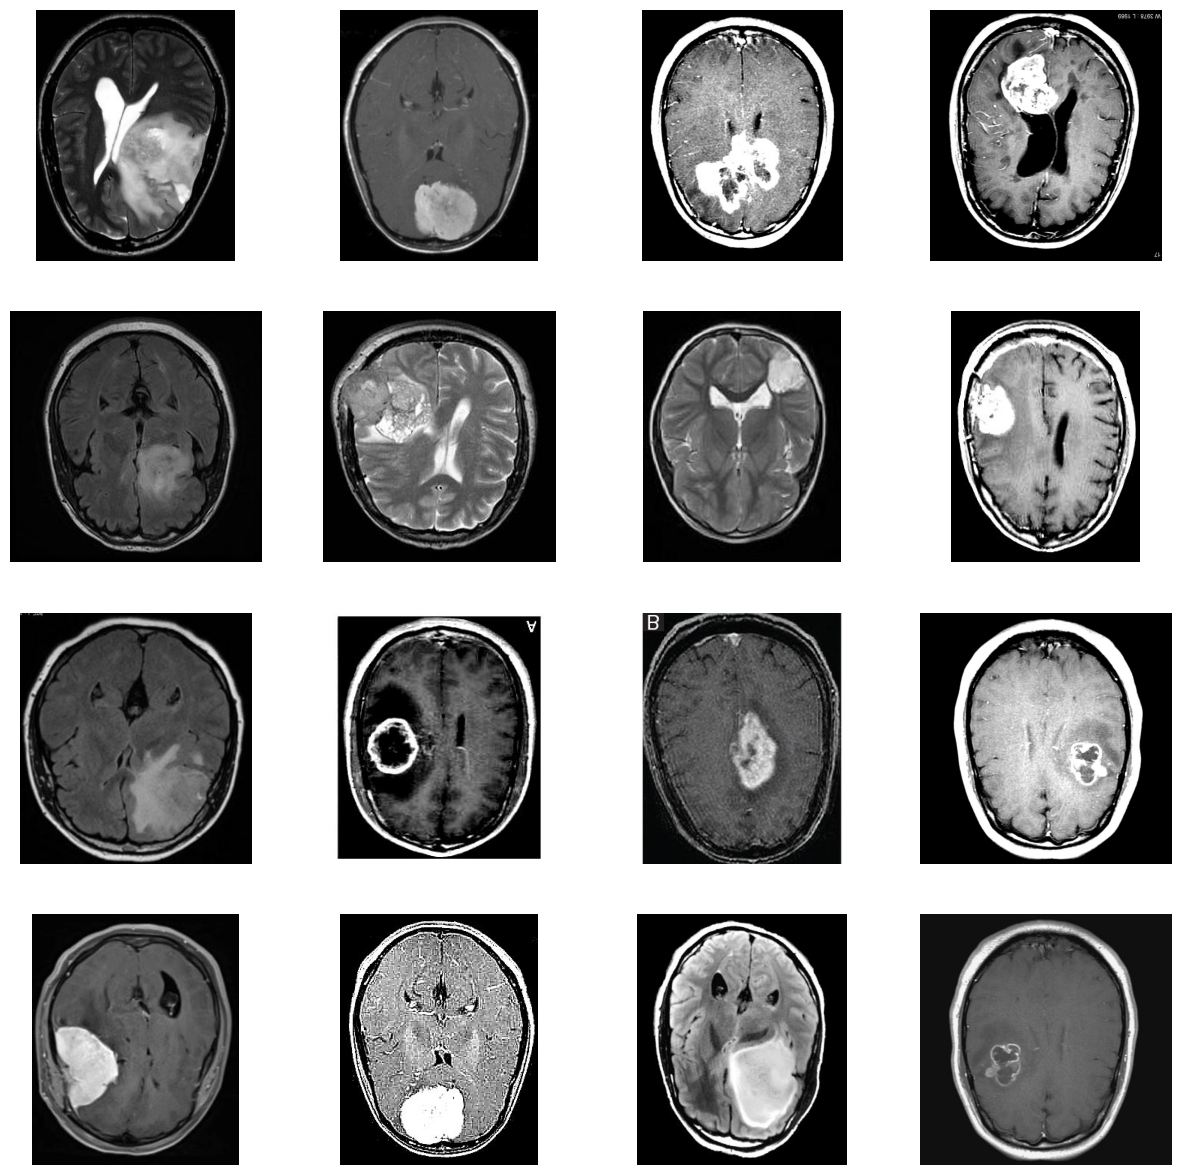

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
train_img="tumor"
no_train_img="no_tumor"
image_files = os.listdir(train_img)
random_images = random.sample(image_files, 16)
for i, image_file in enumerate(random_images):
  row_idx = (i) // 4
  col_idx = (i) % 4
  image_path = os.path.join(train_img, image_file)
  image1 = cv2.imread(image_path)
  image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  axes[row_idx, col_idx].imshow(image2)
  axes[row_idx, col_idx].axis('off')
plt.show()


After loading the files, the initial preprocessing steps involve:

Converting Color Format: The images are converted from BGR to RGB format since the OpenCV library reads images in BGR by default.

Resizing Images: All images are resized to a predefined size to ensure uniformity and consistency in dimensions.

Organizing Data: The resized images are appended to lists along with their corresponding labels, facilitating easy access and management during subsequent analysis.

Store the images and their corresponding labels in different lists.


*   0 for No Tumor
*   1 for Tumor



In [5]:
tumor=[]
no_tumor=[]
t_image_files = os.listdir(train_img)
nt_image_files = os.listdir(no_train_img)
for t_img in image_files:
  image_path_t = os.path.join(train_img, t_img)
  image1_t = cv2.imread(image_path_t)
  image2_t = cv2.cvtColor(image1_t, cv2.COLOR_BGR2RGB)
  img_t = cv2.resize(image2_t, (128, 128))
  tumor.append((img_t, 1))


for tn_img in nt_image_files:
  image_path_nt = os.path.join(no_train_img, tn_img)
  image1_nt = cv2.imread(image_path_nt)
  image2_nt = cv2.cvtColor(image1_nt, cv2.COLOR_BGR2RGB)
  img_nt = cv2.resize(image2_nt, (128, 128))
  no_tumor.append((img_nt, 0))

**Convert to numpy array format and save them seperately.**

In [6]:
all_data = tumor + no_tumor

data = np.array([item[0] for item in all_data])
label = np.array([item[1] for item in all_data])

Display fractured and healthy scans using labels **yes** and **no**.

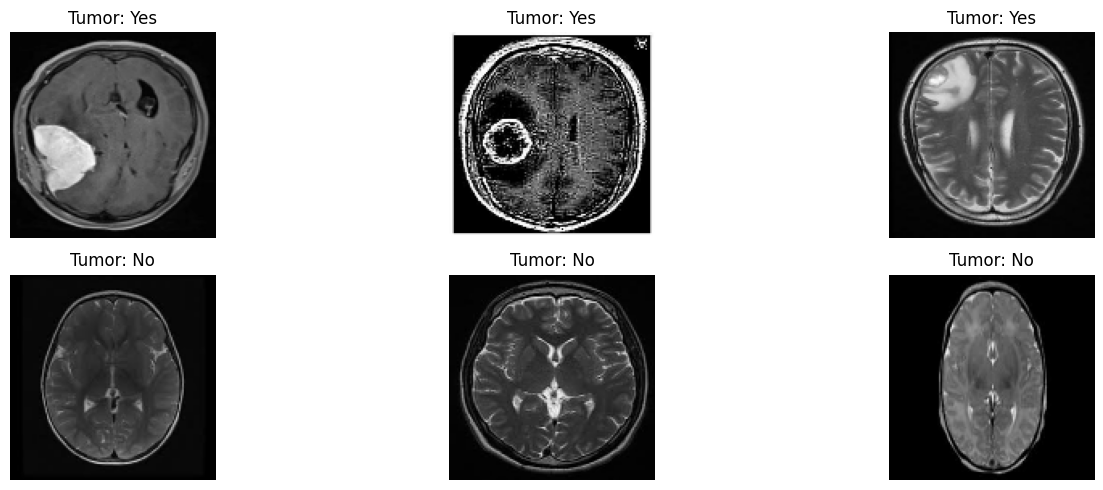

In [7]:
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(tumor[i][0])
    plt.title("Tumor: Yes")
    plt.axis('off')

# Display no_tumor images with label 'no'
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(no_tumor[i][0])
    plt.title("Tumor: No")
    plt.axis('off')

plt.tight_layout()
plt.show()

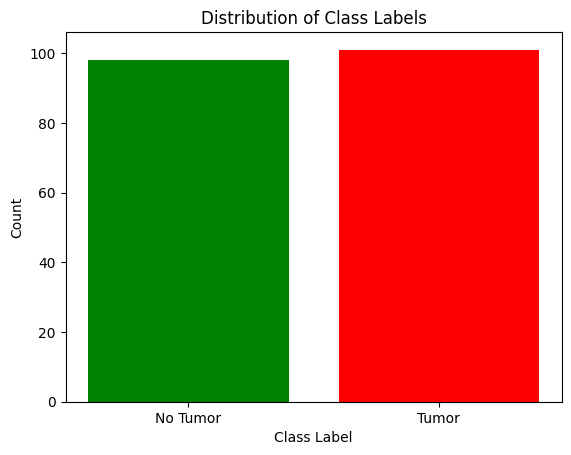

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
unique_labels, label_counts = np.unique(label, return_counts=True)

plt.bar(unique_labels, label_counts, color=['green', 'red'])
plt.xticks(unique_labels, ['No Tumor', 'Tumor'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()
print(label)



*   **Import tf and keras for image classification.**
*   **Also import other packages needed for plotting.**



In [9]:
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout ,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.utils import to_categorical

**Split this dataset into training and testing data respectively.**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.20, random_state=42)
x_train= x_train /255.0
x_test = x_test / 255.0
print(y_test)


[1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0
 0 1 1]


In [15]:
print("Minimum value of the scaled data:", x_train.min())
print("Maximum value of the scaled data:",  x_train.max())

Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


**Build a conventional CNN architecture for image classifying.**

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

**Compile the model and get the summary.**

In [17]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

**Train our model with the dataset with epochs=10, batch_size=32.**

In [20]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 0.5866 - accuracy: 0.6693 - val_loss: 0.3283 - val_accuracy: 0.8438
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.3868 - accuracy: 0.8346 - val_loss: 0.3696 - val_accuracy: 0.8125
Epoch 3/10
4/4 [==============================] - 4s 992ms/step - loss: 0.4531 - accuracy: 0.7953 - val_loss: 0.3015 - val_accuracy: 0.8750
Epoch 4/10
4/4 [==============================] - 4s 1s/step - loss: 0.3425 - accuracy: 0.8504 - val_loss: 0.2789 - val_accuracy: 0.8750
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.3222 - accuracy: 0.8740 - val_loss: 0.2457 - val_accuracy: 0.9062
Epoch 6/10
4/4 [==============================] - 4s 971ms/step - loss: 0.2581 - accuracy: 0.8740 - val_loss: 0.2153 - val_accuracy: 0.9375
Epoch 7/10
4/4 [==============================] - 4s 968ms/step - loss: 0.2612 - accuracy: 0.8898 - val_loss: 0.1749 - val_accuracy: 0.9375
Epoch 8/10
4/4 [================

**Evaluate the model to get loss and accuracy of our model.**

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

2/2 [==============================] - 0s 65ms/step - loss: 0.1919 - accuracy: 0.9250
Test Loss: 0.1918695718050003
Test Accuracy: 0.925000011920929


**Predict for a sample image.**

In [30]:
image_path_et = "sample.jpg"
image1_et = cv2.imread(image_path_et)
image2_et = cv2.cvtColor(image1_et, cv2.COLOR_BGR2RGB)
img_et = np.array(cv2.resize(image2_et, (128, 128)))
print(model.input_shape)
img_et = np.expand_dims(img_et, axis=0)
print(img_et.shape)
res = model.predict(img_et)
print(res)



(None, 128, 128, 3)
(1, 128, 128, 3)
1/1 [==============================] - 0s 130ms/step
[[0.]]


**Plot the graph for loss and accuracy.**

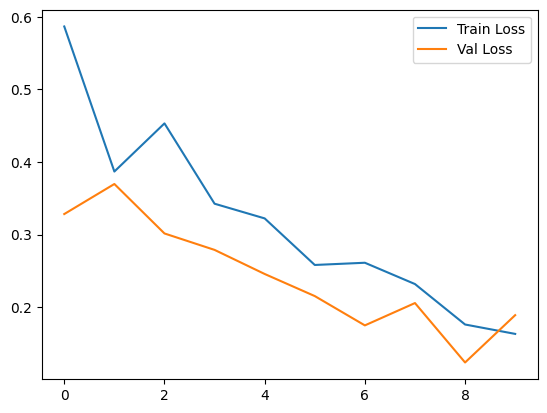

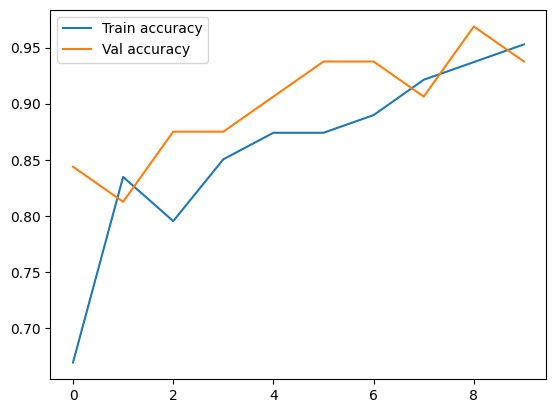

In [29]:
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Val accuracy")
plt.legend()
plt.show()

**Save the model.**

In [31]:
model.save("brain_tumor.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
